## Kaggle house prediction

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
    

In [1]:
%config Completer.use_jedi=True
import pandas as pd
import sklearn
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
# importing dataset

df_train=pd.read_csv('F:/kaggle/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('F:/kaggle/house-prices-advanced-regression-techniques/test.csv')
frames=[df_train,df_test]
df=pd.concat(frames)


In [3]:
print( df_train.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
# Basic function for primitive analysis

def primitive_analysis(df):
    print('-----Dataset Overview------\n')
    #dataset info
    print('\n-----Dataset info-------')
    print(df.info())
    print('\n-----Dataset Dimensions-------')
    print(df.ndim)
    print('\n-----Dataset size-------')
    print(df.shape)
    print('\n-----Dataset axes-------')
    print(df.axes)



        

In [5]:
primitive_analysis(df_train)

-----Dataset Overview------


-----Dataset info-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 1

## Data Cleansing

In [6]:

class data_cleansing:
    def __init__(self):
        pass
    
# Dropping columns which has too many missing values (>1000 values of 1459 values missing)    
    def drop_columns(self,df):
        for i in df.columns:
            if sum(df[i].isnull())>500:
                df.drop(i,axis=1,inplace=True)
        return df
#Size of new dataset after removing columns with more number of missing values                
    def view_row_column_count(self,df):
        print('----Size of the new dataset----\n')
        print(df.shape)
    
#Checking the missing values
    def check_missing_values(self,df):
        total_nulls=df.isnull().sum()
        for key,value in total_nulls.iteritems():
            print(key,":",value)
            
#Fill features with missing values
    def fill_features_missing_values(self,df,features):
        print('\n------check for missing values in main features-----')
        missing_values=df[features].isnull().sum()
        missing=[]
        print(missing_values)
        
        imputer=SimpleImputer(strategy='mean',missing_values=np.nan)
        for i in features:
            if df[i].isnull().sum()>0:
                missing.append(i)
            print('-----Features with missing values----\n', missing)
            
        imputer=imputer.fit(df[missing])
        df[missing]=imputer.transform(df[missing])
        
        print('\n------ final check for missing values in main features----')
        missing_values=df[features].isnull().sum()
        print(missing_values)
        
        return df
    
    def check_duplicates(self,df):
        print('\n---- Duplicare Items-----')
        duplicate=df[df.duplicated()]
        df=df[~df.index.duplicated()]
        print(duplicate)
        return df
    
#Convert columns to categories

    def string_to_categorical(self,df):
        modified_df=df
        #selecting all columns with string data
        new_df=df.select_dtypes(include=['object'])
        for cname in new_df.columns:
            modified_df[cname]=pd.Categorical(modified_df[cname])
            
        return modified_df
    
#convert categorical to numeric
    
    def categorical_to_numeric(self,df):
        from sklearn import preprocessing

#Label encoder can be used to normalize labels. It can also be used to transform non-numerical labels (hashable and comparable) to numeric labels)
        le=preprocessing.LabelEncoder()
        new_df=df.select_dtypes(include=['category'])
        modified_df=df
        col_dic={}
        
        
        for cname in new_df.columns:
            series=df[cname]
            df[cname]=pd.Series(le.fit_transform(series[series.notnull()]),
                                index=series[series.notnull()].index)
            le_name_mapping=dict(zip(le.transform(le.classes_),le.classes_))
            col_dic[cname]=le_name_mapping
            
        return modified_df, col_dic
    
   
        
    

In [7]:
def convert_obj_cols_to_numeric(self, df):
        df_sample1 = df
        #print(df_sample1["MasVnrType"].to_string())
        
        MSZoning_values = df_sample1["MSZoning"].unique()
        Street_values = df_sample1["Street"].unique()
        LotShape_values = df_sample1["LotShape"].unique()
        LandContour_values = df_sample1["LandContour"].unique()
        Utilities_values = df_sample1["Utilities"].unique()
        LotConfig_values = df_sample1["LotConfig"].unique()
        LandSlope_values = df_sample1["LandSlope"].unique()
        Neighborhood_values = df_sample1["Neighborhood"].unique()
        Condition1_values = df_sample1["Condition1"].unique()
        Condition2_values = df_sample1["Condition2"].unique()
        BldgType_values = df_sample1["BldgType"].unique()
        HouseStyle_values = df_sample1["HouseStyle"].unique()
        RoofStyle_values = df_sample1["RoofStyle"].unique()
        RoofMatl_values = df_sample1["RoofMatl"].unique()
        Exterior1st_values = df_sample1["Exterior1st"].unique()
        Exterior2nd_values = df_sample1["Exterior2nd"].unique()
        ExterQual_values = df_sample1["ExterQual"].unique()
        ExterCond_values = df_sample1["ExterCond"].unique()
        Foundation_values = df_sample1["Foundation"].unique()
        BsmtQual_values = df_sample1["BsmtQual"].unique()
        BsmtCond_values = df_sample1["BsmtCond"].unique()
        BsmtExposure_values = df_sample1["BsmtExposure"].unique()
        BsmtFinType1_values = df_sample1["BsmtFinType1"].unique()
        BsmtFinType2_values = df_sample1["BsmtFinType2"].unique()
        Heating_values = df_sample1["Heating"].unique()
        HeatingQC_values = df_sample1["HeatingQC"].unique()
        CentralAir_values = df_sample1["CentralAir"].unique()
        Electrical_values = df_sample1["Electrical"].unique()
        KitchenQual_values = df_sample1["KitchenQual"].unique()
        Functional_values = df_sample1["Functional"].unique()
        GarageType_values = df_sample1["GarageType"].unique()
        GarageFinish_values = df_sample1["GarageFinish"].unique()
        GarageQual_values = df_sample1["GarageQual"].unique()
        GarageCond_values = df_sample1["GarageCond"].unique()
        PavedDrive_values = df_sample1["PavedDrive"].unique()
        SaleType_values = df_sample1["SaleType"].unique()
        SaleCondition_values = df_sample1["SaleCondition"].unique()
        
        # create a dictionary to keep obj values as a numeric in order to calculate Correlation
        
        df_sample1['MasVnrType'] = df_sample1['MasVnrType'].replace(['None', 'Stone', 'BrkCmn', 'BrkFace'], [0,1,2, 3])
        #df_sample1['MSZoning'] = df_sample1['MSZoning'].replace(['RL','RM','C (all)','FV','RH'], [0,1,2,3,4])
        #df_sample1['Street'] = df_sample1['Street'].replace(['Pave','Grvl'], [0,1])
        df_sample1['LotShape'] = df_sample1['LotShape'].replace(['Reg','IR1','IR2','IR3'], [0,1,2,3])
        df_sample1['LandContour'] = df_sample1['LandContour'].replace(['Lvl','Bnk','Low','HLS'], [0,1,2,3])
        #df_sample1['Utilities'] = df_sample1['Utilities'].replace(['AllPub','NoSeWa'], [0,1])
        df_sample1['LotConfig'] = df_sample1['LotConfig'].replace(['Inside','FR2','Corner','CulDSac','FR3'], [0,1,2,3,4])
        df_sample1['LandSlope'] = df_sample1['LandSlope'].replace(['Gtl','Mod','Sev'], [0,1,2])
        df_sample1['Neighborhood'] = df_sample1['Neighborhood'].replace(['CollgCr','Veenker','Crawfor','NoRidge' ,'Mitchel' ,'Somerst' ,'NWAmes',
 'OldTown' ,'BrkSide', 'Sawyer' ,'NridgHt' ,'NAmes' ,'SawyerW' ,'IDOTRR',
 'MeadowV' ,'Edwards' ,'Timber', 'Gilbert' ,'StoneBr' ,'ClearCr' ,'NPkVill',
 'Blmngtn' ,'BrDale' ,'SWISU', 'Blueste'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
        #df_sample1['Condition1'] = df_sample1['Condition1'].replace(['Norm','Feedr' ,'PosN' ,'Artery' ,'RRAe' ,'RRNn' ,'RRAn' ,'PosA' ,'RRNe'], [0,1,2,3,4,5,6,7,8])
        #df_sample1['Condition2'] = df_sample1['Condition2'].replace(['Norm','Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], [0,1,2,3,4,5,6,7])
        #df_sample1['BldgType'] = df_sample1['BldgType'].replace(['1Fam' ,'2fmCon' ,'Duplex' ,'TwnhsE', 'Twnhs'], [0,1,2,3,4])
        #df_sample1['HouseStyle'] = df_sample1['HouseStyle'].replace(['2Story' ,'1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin'], [0,1,2,3,4,5,6,7])
        df_sample1['RoofStyle'] = df_sample1['RoofStyle'].replace(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], [0,1,2,3,4,5])
        #df_sample1['RoofMatl'] = df_sample1['RoofMatl'].replace(['CompShg','WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll','ClyTile'], [0,1,2,3,4,5,6,7])
        df_sample1['Exterior1st'] = df_sample1['Exterior1st'].replace(['VinylSd' ,'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd',
 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
        df_sample1['Exterior2nd'] = df_sample1['Exterior2nd'].replace(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng', 'CmentBd',
 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'AsphShn', 'Stone','Other', 'CBlock'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) 
        #df_sample1['ExterQual'] = df_sample1['ExterQual'].replace(['Gd' ,'TA', 'Ex', 'Fa'], [0,1,2,3])
        #df_sample1['ExterCond'] = df_sample1['ExterCond'].replace(['TA', 'Gd', 'Fa', 'Po', 'Ex'], [0,1,2,3,4])
        #df_sample1['Foundation'] = df_sample1['Foundation'].replace(['PConc' ,'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], [0,1,2,3,4,5])
        #df_sample1['BsmtQual'] = df_sample1['BsmtQual'].replace(['Gd' ,'TA', 'Ex','Fa'], [0,1,2,3])
        #df_sample1['BsmtQual'] = df_sample1['BsmtQual'].replace(['Gd' ,'TA', 'Ex','Fa'], [0,1,2,3])
        #df_sample1['BsmtCond'] = df_sample1['BsmtCond'].replace(['TA', 'Gd','Fa', 'Po'], [0,1,2,3])
        df_sample1['BsmtExposure'] = df_sample1['BsmtExposure'].replace(['No','Gd', 'Mn', 'Av'], [0,1,2,3])
        #df_sample1['BsmtFinType1'] = df_sample1['BsmtFinType1'].replace(['GLQ','ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], [0,1,2,3,4,5])
        #df_sample1['BsmtFinType2'] = df_sample1['BsmtFinType2'].replace(['Unf' ,'BLQ','ALQ', 'Rec', 'LwQ', 'GLQ'], [0,1,2,3,4,5])
        #df_sample1['BsmtExposure'] = df_sample1['BsmtExposure'].replace(['No','Gd', 'Mn', 'Av'], [0,1,2,3])
        #df_sample1['Heating'] = df_sample1['Heating'].replace(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], [0,1,2,3,4,5])
        #df_sample1['HeatingQC'] = df_sample1['HeatingQC'].replace(['Ex' ,'Gd', 'TA', 'Fa', 'Po'], [0,1,2,3,4])
        #df_sample1['CentralAir'] = df_sample1['CentralAir'].replace(['Y' ,'N'], [0,1])
        #df_sample1['Electrical'] = df_sample1['Electrical'].replace(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], [0,1,2,3,4])
        #df_sample1['KitchenQual'] = df_sample1['KitchenQual'].replace(['Gd', 'TA', 'Ex', 'Fa'], [0,1,2,3])
        #df_sample1['Functional'] = df_sample1['Functional'].replace(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], [0,1,2,3,4,5,6])
        #df_sample1['GarageType'] = df_sample1['GarageType'].replace(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'], [0,1,2,3,4,5])
        df_sample1['GarageFinish'] = df_sample1['GarageFinish'].replace(['RFn' ,'Unf', 'Fin'], [0,1,2])
        #df_sample1['GarageQual'] = df_sample1['GarageQual'].replace(['TA','Fa', 'Gd','Ex', 'Po'], [0,1,2,3,4])
        #df_sample1['PavedDrive'] = df_sample1['PavedDrive'].replace(['Y', 'N', 'P'], [0,1,2])
        df_sample1['SaleType'] = df_sample1['SaleType'].replace(['WD' ,'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'], [0,1,2,3,4,5,6,7,8])
        df_sample1['SaleCondition'] = df_sample1['SaleCondition'].replace(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'], [0,1,2,3,4,5])
        
        # in this section, columns with better correlation recorded in a dictionary with their original values
        dic_columns = { "MasVnrType":['None', 'Stone', 'BrkCmn', 'BrkFace'], 
                        "LotShape":['Reg','IR1','IR2','IR3'],
                        "LandContour":['Lvl','Bnk','Low','HLS'],
                        "LotConfig":['Inside','FR2','Corner','CulDSac','FR3'],
                        "LandSlope":['Gtl','Mod','Sev'], # great
                        "RoofStyle":['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], # good
                        "BsmtExposure":['No','Gd', 'Mn', 'Av'], # good
                        "GarageFinish":['RFn' ,'Unf', 'Fin'], # good
                        "SaleType":['WD' ,'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'], #good
                        "SaleCondition":['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'] #good
                      }
        
        return df_sample1


In [8]:
obj_cleaning=data_cleansing()
obj_cleaning.view_row_column_count(df)
df=obj_cleaning.check_duplicates(df)
df=obj_cleaning.string_to_categorical(df)
df, col_dic=obj_cleaning.categorical_to_numeric(df)
obj_cleaning.check_missing_values(df)


----Size of the new dataset----

(2919, 81)

---- Duplicare Items-----
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, Sal

In [9]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,NaN,3,3,0,...,0,NaN,NaN,NaN,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,NaN,3,3,0,...,0,NaN,NaN,NaN,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,NaN,0,3,0,...,0,NaN,NaN,NaN,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,NaN,0,3,0,...,0,NaN,NaN,NaN,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,NaN,0,3,0,...,0,NaN,NaN,NaN,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,NaN,3,3,0,...,0,NaN,NaN,NaN,0,8,2007,8,4,175000.0
1456,1457,20,3,85.0,13175,1,NaN,3,3,0,...,0,NaN,2.0,NaN,0,2,2010,8,4,210000.0
1457,1458,70,3,66.0,9042,1,NaN,3,3,0,...,0,NaN,0.0,2.0,2500,5,2010,8,4,266500.0
1458,1459,20,3,68.0,9717,1,NaN,3,3,0,...,0,NaN,NaN,NaN,0,4,2010,8,4,142125.0


In [10]:
class EDA:
    def __init__(self):
        pass
    
#selecting features by highest correlation    
    def feature_select(self,df,target):
        correlations=[]
        correlations_col=[]
        corr_dic={}
        features=[]
        m=0
        j=0
        
        for i in df.columns:
            tmp=df[target].corr(df[i])
            correlations.append(tmp)
            correlations_col.append(df.columns[j])
            j+=1
            
        j=0
        for cor in correlations:
            if abs(cor)>0.5:
                corr_dic[m]=cor
                m+=1
                features.append(correlations_col[j])
                print('Corr( ',correlations_col[j] , ' ) = ', cor )
                
            j+=1
        print("\n -----features are----\n")
        print(features)
        return corr_dic, features
   
#describe the overall characteristics of the target dataset (mean,median,mode)
    def central_tendency(self, df, features):
        print('\n-----Central Tendancies-----\n')
        dsc=df[features].describe(include='all')
        print(dsc)
        
    def variability(self, df, features):
        print('\n---Variability STD, Variance, Covariance------\n')
        for i in range(0,len(features)):
            variance=statistics.variance(df[features[i]])
            stdev=statistics.stdev(df[features[i]])
            print('Variance is -  ', features[i], variance)
            print('STD is  is -  ', features[i], stdev)
            
        print('\n---Covariance----\n')
        print(df[features].cov())
        
#quartiles
    def shape(self, df, features):
        sns.boxplot(data=df[features],orient='h')
        plt.title('All Columns')
        plt.show()
        sns.pairplot(df,vars=['SalePrice',"OverallQual" , "GrLivArea"])
        
    def plot(self, df, features):
        for i in range(1, len(features)):
            plt.scatter(df['SalePrice'],df[features[i]], color='g')
            plt.title(f'Sale Price vs {features[i]}')
            plt.xlabel("SalePrice")
            plt.ylabel(features[i])
            sns.regplot(df["SalePrice"] , df[features[i]] , ci=None)
            plt.show()
            
    def skewness(self, df, features):
        print('\n-----Skewness------\n')
        sci=skew(df)
        for i in range(1, len(features)):
            sci = skew(df[features[i]])
            sci = float("{:.2f}".format(sci))
            print("skewness(", df[features[i]] , ") = " , sci)   
        print("\nguideline: \n")
        print("""Skewness = 0 when the distribution is normal.\nSkewness > 0 or positive when more weight is on the left side of the distribution. 
        \nSkewness < 0 or negative when more weight is on the right side of the distribution.""")
            
        
    def kurtosis(self, df, features):
        print('\n-----Kurtosis------\n')
        for i in range(1, len(features)):
            kur = kurtosis(df[features[i]])
            kur = float("{:.2f}".format(kur))
            print("Kurtosis(", df[features[i]] , ") = " , kur) 
                
        print("\nguideline: \n")
        print("""# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.\n
# That is, data sets with high kurtosis tend to have heavy tails, or outliers.\n
# Data sets with low kurtosis tend to have light tails, or lack of outliers.""")
        print(""" Kurtosis > 3 => Leptokurtic (Peaked) \n Kurtosis = 3 => Mesokurtic (Normal) \n Kurtosis < 3 => Platykurtic (Flat) """)
        
        
    def train_test_split(self, df, features):
        df1 = df.iloc[:1460,:]
        df2 = df.iloc[1460:,:]
        print("df2" , df2)
            


        
        
    
    
    
            

Corr(  OverallQual  ) =  0.7909816005838048
Corr(  YearBuilt  ) =  0.5228973328794969
Corr(  YearRemodAdd  ) =  0.5071009671113864
Corr(  ExterQual  ) =  -0.6368836943991134
Corr(  BsmtQual  ) =  -0.6111786797577105
Corr(  TotalBsmtSF  ) =  0.6135805515591956
Corr(  1stFlrSF  ) =  0.6058521846919147
Corr(  GrLivArea  ) =  0.7086244776126522
Corr(  FullBath  ) =  0.5606637627484456
Corr(  KitchenQual  ) =  -0.5891887782994202
Corr(  TotRmsAbvGrd  ) =  0.5337231555820284
Corr(  GarageFinish  ) =  -0.5131053120878742
Corr(  GarageCars  ) =  0.6404091972583531
Corr(  GarageArea  ) =  0.6234314389183617
Corr(  SalePrice  ) =  1.0

 -----features are----

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice']

------check for missing values in main features-----
OverallQual      0
YearBuilt        0
YearRemodAdd     0
ExterQual        0
Bs

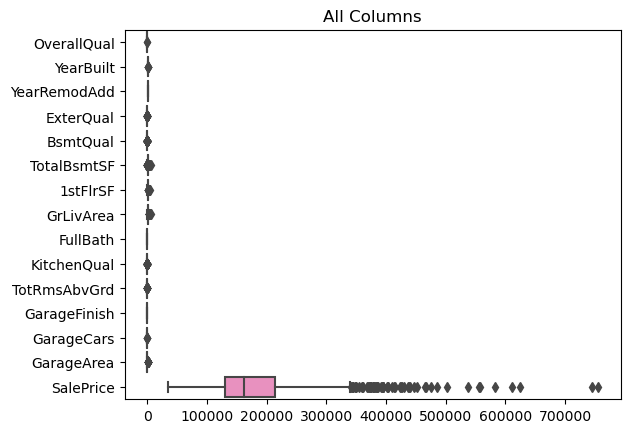

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

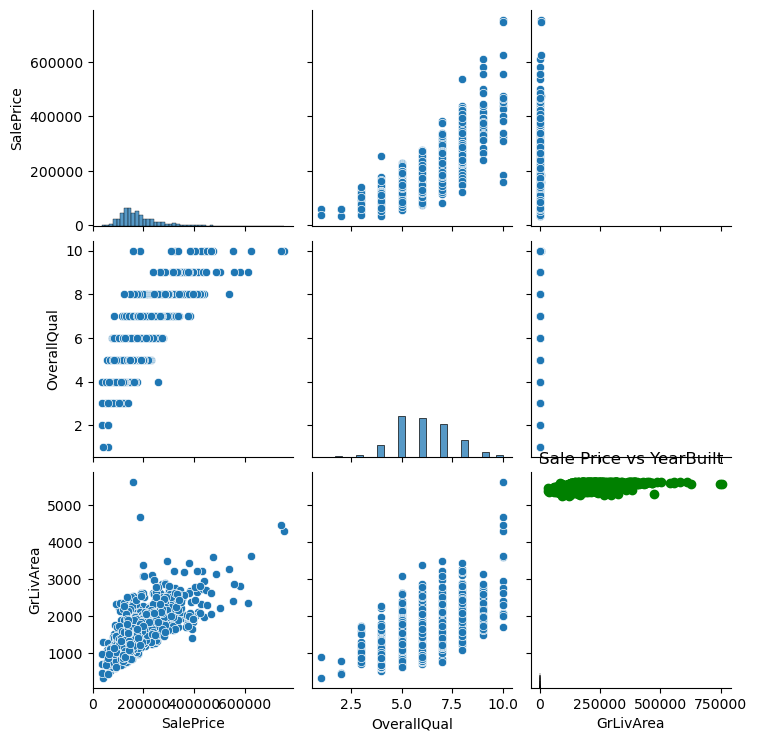

In [11]:
obj_eda=EDA()
#select features by highest correlation
#using iloc because first 1460 data belongs to train dataset

df = obj_cleaning.drop_columns(df)
df = obj_cleaning.string_to_categorical(df)
df, col_dic = obj_cleaning.categorical_to_numeric(df)
corr_dic, features = obj_eda.feature_select(df.iloc[:1460, :] , "SalePrice")
df = obj_cleaning.fill_features_missing_values(df, features)
df = obj_cleaning.drop_columns(df)

obj_eda.train_test_split(df, features)

obj_eda.central_tendency(df, features)
obj_eda.variability(df, features)
obj_eda.shape(df, features)
obj_eda.plot(df, features)
obj_eda.skewness(df, features)
obj_eda.kurtosis(df, features)










In [13]:
obj_eda.train_test_split(df, features)

df2 Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]


## Regression

In [27]:
class Regression:
    def __init__(self,features):
        self.options=range(0,len(features))
    
    def simple_regression(self,df,features):
        while true:
            while true:
                print('\n Choose one of the independent features from below:\n')
                for i in self.options:
                    print('press', i , 'for ', features[i])
                try:
                    x=int(input())
                    if x in self.options:
                        break
                    else:
                        print('Please enter right input',self.options)
                        continue
                        
                except valueerror:
                    print('wrong input. please enter in', self.options)
                    continue
                    
            y=df['SalePrice']
            
            model=LinearRegression()
            X=np.array(x).reshape(-1,1)
            X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0, test_size=0.20)
            model.fit(X_train,y_train)
            r_sq=model.score(X_train,y_train)
            print('R-sq = ', r_sq)
            
            intercept=model.intercept_
            print('intercept: ',intercept)
            slope=model.coef_
            print('slope: ',slope)
            y_pred=model.predict(X_test)
            print('predictions: ',y_pred)
            
            print("\nguideline: \n")
            print("""The coefficient of determination is a number between 0 and 1 that measures how well a statistical model predicts an outcome. 
            A larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs\nThe value 𝑅² = 1 corresponds to SSR = 0 (simple linear regression). 
            That’s the perfect fit, since the values of predicted and actual responses fit completely to each other.\n\nThe value of 𝑏₀, also called the intercept, shows the point where the estimated regression line crosses the 𝑦 axis. It’s the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. The value of 𝑏₁ determines the slope of the estimated regression line.""")
            print("\nThe slope indicates the rate of change in y per unit change in x.\nThe y-intercept indicates the y-value when the x-value is 0")

    def multiple_regression(self, df, features, predicted_prices):
        #features.remove('SalePrice')
        x = df[features]
        y = df["SalePrice"]#.apply(np.log)
        print(features)
        
        print("\n--- Multiple Regression Result ---")
        #model = LinearRegression()
        X = np.array(x).reshape(-1, len(features))
        n = 30
        r_sq = 0
        for i in range(n):
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = i, test_size=.15)
            model = LinearRegression()
            model.fit(X_train, y_train)
            r_sq = r_sq + model.score(X_train, y_train)
            
        print("\nCoefficient of Determination (𝑅²) = ", r_sq/n)
        
        intercept = model.intercept_
        print("\nintercept = ", intercept)
        
        coef = model.coef_
        print("\ncoefficient (slope) = ", coef)
        
        predicted_prices = model.predict(X_test)
        print("\ny_predict = ", predicted_prices)
        return predicted_prices
        


        
                        
    

In [28]:
predicted_prices = []
obj_regression = Regression(features)
#obj_regression.simple_regression(df, features)
predicted_prices = obj_regression.multiple_regression(df, features, predicted_prices)

print(df.shape)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea']

--- Multiple Regression Result ---

Coefficient of Determination (𝑅²) =  0.7998554096171033

intercept =  -511280.654174317

coefficient (slope) =  [ 1.28525123e+04  1.17357479e+02  1.61049589e+02 -6.96126008e+03
 -1.10585401e+04  3.06463974e+01  7.78395297e+00  6.18511908e+01
 -1.03011296e+04 -8.33511303e+03 -1.51428365e+03 -3.94594625e+03
  2.63992542e+03  3.54116188e+01]

y_predict =  [136382.21225775 141456.23043207 310921.25249205 115753.40466864
 224343.13713481 178983.21258829 161063.22439856 190331.27592316
 148017.37837271 116805.55938843 272580.66060065 188895.60629852
  97175.67588241 135319.28012003 146589.39598332 146524.47078547
  98036.35952487 123081.91671302 168319.37343307 115793.25998822
  96159.63888668 170271.86683949 236492.93815428 303418.96140147
 224855.57454666 1758